In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Exploratory Data Analysis of education

##### Preparation of the data

In [3]:
df_public = pd.read_csv('D:\\Udacity\\data\\schools\\Public_Schools.csv')
df_private = pd.read_csv('D:\\Udacity\\data\\schools\\Private_Schools.csv')

This two dataframes come from the same source. However, before merging them together, we need to check if the columns are named properly or if there are different columns between the two dataframes.

In [4]:
df_public.columns

Index(['X', 'Y', 'OBJECTID', 'NCESID', 'NAME', 'ADDRESS', 'CITY', 'STATE',
       'ZIP', 'ZIP4', 'TELEPHONE', 'TYPE', 'STATUS', 'POPULATION', 'COUNTY',
       'COUNTYFIPS', 'COUNTRY', 'LATITUDE', 'LONGITUDE', 'NAICS_CODE',
       'NAICS_DESC', 'SOURCE', 'SOURCEDATE', 'VAL_METHOD', 'VAL_DATE',
       'WEBSITE', 'LEVEL_', 'ENROLLMENT', 'ST_GRADE', 'END_GRADE',
       'DISTRICTID', 'FT_TEACHER', 'SHELTER_ID'],
      dtype='object')

In [5]:
df_private.columns

Index(['X', 'Y', 'FID', 'OBJECTID', 'NCESID', 'NAME', 'ADDRESS', 'CITY',
       'STATE', 'ZIP', 'ZIP4', 'TELEPHONE', 'TYPE', 'STATUS', 'POPULATION',
       'COUNTY', 'COUNTYFIPS', 'COUNTRY', 'LATITUDE', 'LONGITUDE',
       'NAICS_CODE', 'NAICS_DESC', 'SOURCE', 'SOURCEDATE', 'VAL_METHOD',
       'VAL_DATE', 'WEBSITE', 'LEVEL_', 'ENROLLMENT', 'START_GRAD',
       'END_GRADE', 'FT_TEACHER', 'SHELTER_ID'],
      dtype='object')

There are two differences between the columns of each dataframe. Firstly, the private dataframe has a column called FID. Secondly, the private school dataframe has a START_GRAD column whereas the public school dataframe has a ST_GRADE.

In [6]:
df_private['FID'].head(10)

0     1
1     2
2     3
3     4
4     5
5     6
6     7
7     8
8     9
9    10
Name: FID, dtype: int64

In [7]:
df_private['FID'].describe()

count    31064.000000
mean     15532.500000
std       8967.548717
min          1.000000
25%       7766.750000
50%      15532.500000
75%      23298.250000
max      31064.000000
Name: FID, dtype: float64

We have to add a new column named AVAILABILITY to make a distinction between public and private schools.

In [8]:
df_public['AVAILABILTY'] = 'public'
df_private['AVAILABILTY'] = 'private'

Seems like the FID column is just an identification column. In that case, we can drop the column and then rename the START_GRAD to ST_GRAD in order to concat the two dataframes. 

In [9]:
df_private.drop(['FID'], axis=1,inplace=True)
df_private.rename(columns={'START_GRAD':'ST_GRADE'}, inplace=True)

In [10]:
df= pd.concat([df_public,df_private])

In [11]:
f"""This concatenated dataframe has {len(df.index)} rows and there are {df["OBJECTID"].nunique()} unique values in the OBJECTID column"""

'This concatenated dataframe has 133398 rows and there are 102334 unique values in the OBJECTID column'

The OBJECTID column is not a good identification for our schools because we have some duplicates values. To fix this, we are going to create a new index column.

In [12]:
df.reset_index(inplace=True)

In [13]:
df.head(3)

,index,X,Y,OBJECTID,NCESID,NAME,ADDRESS,CITY,STATE,ZIP,...,VAL_DATE,WEBSITE,LEVEL_,ENROLLMENT,ST_GRADE,END_GRADE,DISTRICTID,FT_TEACHER,SHELTER_ID,AVAILABILTY
0,0,-9.844095e+06,5.230976e+06,1,170330000017,ALDEN-HEBRON HIGH SCHOOL,9604 ILLINOIS ST,HEBRON,IL,60034,...,2010/08/27 00:00:00,NOT AVAILABLE,HIGH,112,09,12,1703300.0,11,NOT AVAILABLE,public
1,1,-9.007027e+06,4.195442e+06,2,370297001287,WESTERLY HILLS ACADEMY,4420 DENVER AVE,CHARLOTTE,NC,28208,...,2016/08/22 00:00:00,http://schools.cms.k12.nc.us/westerlyhillsES,ELEMENTARY,495,KG,08,3702970.0,45,NOT AVAILABLE,public
2,2,-9.580426e+06,4.792069e+06,3,180369000584,NORTHWOOD ELEMENTARY SCHOOL,965 GRIZZLY CUB DR,FRANKLIN,IN,46131,...,2010/08/02 00:00:00,NOT AVAILABLE,ELEMENTARY,478,PK,04,1803690.0,25,NOT AVAILABLE,public


We see there are 33 columns. This columns represent:

    - X (float): Unknown.
    - Y (float): Unknown.
    - ObjectId (Integer): identification of the row.
    - NCESID (Text): National Center for Educational Statistics (NCES) district identification number.
    - NAME (Text): Name of the school.
    - ADDRESS (Text): Address of the school.
    - CITY (Text): City of the school.
    - STATE (Text): State of the school.
    - ZIP (Text): first five digit of the zip code.
    - ZIP4 (Text): last four digit of the zip code.
    - TELEPHONE (Text): phone of the school.
    - TYPE (Text): Unknown. Values between 1 - 7
    - STATUS (Text): Unknown. Values between 1 - 2
    - POPULATION (Number): Unknown.
    - COUNTY (Text): County of the school.
    - COUNTYFIPS (Text): FIPS county code.
    - COUNTRY (Text): Country of the school.
    - LATITUDE (Number): latitude of the school.
    - LONGITUDE (Number): longitude of the school.
    - NAICS_CODE (Text): North American Industry Classification System (NAICS) code.
    - NAICS_DESC (Text): North American Industry Classification System (NAICS) description about the school.
    - SOURCE (TEXT): url where the data was extracted.
    - SOURCEDATE (DATE): date of the year when the data was extracted.
    - VAL_METHOD (TEXT): validation method.
    - VAL_DATE (DATE): date of the year when the data was validated.
    - WEBSITE (Text): url of the school's website.
    - LEVEL (Text): education level of the school. 
    - ENROLLMENT (Number): number of students enrolled.
    - ST_GRADE (Text): lowest grade the school offers.
    - END_GRADE (Text): highest grade the school offers. 
    - DISTRICT_ID (Text): district identification of the school.
    - FT_TEACHER (Number): numbers of teachers working.
    - SHELTER_ID (Text): identication of the shelter.
    - AVAILABILITY (Text): if the school is private or public.

For our use case, we only need high level geographical data like the city and the state of the school, the level of education the schools provide and the teachers and students in each school. So that, we are going to drop some of the columns we don't need.

In [14]:
df.columns

Index(['index', 'X', 'Y', 'OBJECTID', 'NCESID', 'NAME', 'ADDRESS', 'CITY',
       'STATE', 'ZIP', 'ZIP4', 'TELEPHONE', 'TYPE', 'STATUS', 'POPULATION',
       'COUNTY', 'COUNTYFIPS', 'COUNTRY', 'LATITUDE', 'LONGITUDE',
       'NAICS_CODE', 'NAICS_DESC', 'SOURCE', 'SOURCEDATE', 'VAL_METHOD',
       'VAL_DATE', 'WEBSITE', 'LEVEL_', 'ENROLLMENT', 'ST_GRADE', 'END_GRADE',
       'DISTRICTID', 'FT_TEACHER', 'SHELTER_ID', 'AVAILABILTY'],
      dtype='object')

In [15]:
df.drop(['X','Y','OBJECTID','NCESID','ADDRESS','ZIP','ZIP4','TELEPHONE','TYPE', 'STATUS', 'POPULATION','COUNTYFIPS','LATITUDE','LONGITUDE',
'NAICS_CODE', 'NAICS_DESC', 'SOURCE', 'SOURCEDATE', 'VAL_METHOD', 'VAL_DATE', 'WEBSITE','LEVEL_', 'ST_GRADE', 'END_GRADE', 'DISTRICTID',
'SHELTER_ID'],inplace=True, axis=1)

In [16]:
df.head(3)

,index,NAME,CITY,STATE,COUNTY,COUNTRY,ENROLLMENT,FT_TEACHER,AVAILABILTY
0,0,ALDEN-HEBRON HIGH SCHOOL,HEBRON,IL,MCHENRY,USA,112,11,public
1,1,WESTERLY HILLS ACADEMY,CHARLOTTE,NC,MECKLENBURG,USA,495,45,public
2,2,NORTHWOOD ELEMENTARY SCHOOL,FRANKLIN,IN,JOHNSON,USA,478,25,public


In [17]:
df.describe()

,index,ENROLLMENT,FT_TEACHER
count,133398.000000,133398.000000,133398.000000
mean,42868.282336,385.298805,-24.627753
std,30249.734751,492.018792,227.739964
min,0.000000,-999.000000,-999.000000
25%,16674.250000,96.000000,9.000000
50%,35634.500000,333.000000,22.000000
75%,68983.750000,573.000000,36.000000
max,102333.000000,14286.000000,1419.000000


In the enrollment and ft_teacher columns, we have some -999 values which is incorrect. We can delete this rows or replace the -999 with a zero value or the mean. Firstly, let's check how many rows has a -999 value.

In [18]:
df['index'][(df['ENROLLMENT'] == -999) | (df['FT_TEACHER'] == -999)].count()

7537

There are a lot of values with missing data. In that case, we are going to use the mean of all the schools that have more than 0 students and teachers.

In [19]:
df['ENROLLMENT'][df['ENROLLMENT'] > 0].mean()

432.34393178988904

In [20]:
df['ENROLLMENT'][df['ENROLLMENT'] < 0] = 432.343931789889

C:\Users\Juyas\AppData\Local\Temp\ipykernel_15016\1727828147.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ENROLLMENT'][df['ENROLLMENT'] < 0] = 432.343931789889


In [21]:
df['FT_TEACHER'][df['FT_TEACHER'] > 0].mean()

28.263525277533745

In [22]:
df['FT_TEACHER'][df['FT_TEACHER'] < 0] = 28.263525277533745

C:\Users\Juyas\AppData\Local\Temp\ipykernel_15016\4111014514.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FT_TEACHER'][df['FT_TEACHER'] < 0] = 28.263525277533745


In [23]:
df.describe()

,index,ENROLLMENT,FT_TEACHER
count,133398.000000,133398.000000,133398.000000
mean,42868.282336,426.351309,27.976013
std,30249.734751,430.696120,24.991641
min,0.000000,0.000000,0.000000
25%,16674.250000,121.000000,11.000000
50%,35634.500000,359.000000,24.000000
75%,68983.750000,573.000000,36.000000
max,102333.000000,14286.000000,1419.000000


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133398 entries, 0 to 133397
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   index        133398 non-null  int64  
 1   NAME         133398 non-null  object 
 2   CITY         133398 non-null  object 
 3   STATE        133398 non-null  object 
 4   COUNTY       133375 non-null  object 
 5   COUNTRY      133398 non-null  object 
 6   ENROLLMENT   133398 non-null  float64
 7   FT_TEACHER   133398 non-null  float64
 8   AVAILABILTY  133398 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 9.2+ MB


Now, I'm going to rename the columns for clarity

In [25]:
new_columns = ['id_school','name','city','state','county','country','n_students','n_teachers','availability']

In [26]:
df.columns = new_columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133398 entries, 0 to 133397
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id_school     133398 non-null  int64  
 1   name          133398 non-null  object 
 2   city          133398 non-null  object 
 3   state         133398 non-null  object 
 4   county        133375 non-null  object 
 5   country       133398 non-null  object 
 6   n_students    133398 non-null  float64
 7   n_teachers    133398 non-null  float64
 8   availability  133398 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 9.2+ MB


There are some null values in the county, so we have to check that.

In [27]:
df[df['county'].isna()]

,id_school,name,city,state,county,country,n_students,n_teachers,availability
111,111,PORCUPINE DAY SCHOOL,PORCUPINE,SD,NaN,USA,197.0,28.263525,public
450,450,RED SHIRT SCHOOL - 04,HERMOSA,SD,NaN,USA,88.0,7.000000,public
1542,1542,NUNAM IQUA SCHOOL,SHELDON POINT,AK,NaN,USA,64.0,5.000000,public
10832,10832,BATESLAND SCHOOL - 01,BATESLAND,SD,NaN,USA,181.0,15.000000,public
15564,15564,MARSHALL SCHOOL,MARSHALL,AK,NaN,USA,119.0,8.000000,public
19164,19164,LITTLE WOUND SCHOOL,KYLE,SD,NaN,USA,948.0,28.263525,public
23174,23174,ROCKYFORD SCHOOL - 03,PORCUPINE,SD,NaN,USA,394.0,30.000000,public
28414,28414,OGLALA LAKOTA COUNTY ALTERNATIVE - 09,PINE RIDGE,SD,NaN,USA,4.0,1.000000,public
32302,32302,HOOPER BAY SCHOOL,HOOPER BAY,AK,NaN,USA,456.0,30.000000,public
34367,34367,RUSSIAN MISSION SCHOOL,RUSSIAN MISSION,AK,NaN,USA,125.0,8.000000,public


In [28]:
df[df['city'] == 'PINE RIDGE']

,id_school,name,city,state,county,country,n_students,n_teachers,availability
28414,28414,OGLALA LAKOTA COUNTY ALTERNATIVE - 09,PINE RIDGE,SD,NaN,USA,4.0,1.000000,public
45778,45778,SUCCESS ACADEMY,PINE RIDGE,KY,WOLFE,USA,23.0,1.000000,public
53542,53542,PINE RIDGE SCHOOL,PINE RIDGE,SD,NaN,USA,929.0,28.263525,public
86375,86375,DESSIE SCOTT SCHOOL,PINE RIDGE,KY,WOLFE,USA,44.0,3.000000,public
93672,93672,WOLF CREEK SCHOOL - 02,PINE RIDGE,SD,NaN,USA,684.0,47.000000,public
119799,17465,RED CLOUD INDIAN SCHOOL,PINE RIDGE,SD,OGALA LAKOTA,USA,568.0,62.000000,private


Some searches on the web show that, schools from the same city can be in differents counties, and we cannot fix them quickly with the data provided in the dataframes. Given that fixing them when there is some error in the data is expensive in time and it is only a small percentage of our dataset, removing incomplete data is the best course of action.

In [29]:
df.dropna(inplace=True)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133375 entries, 0 to 133397
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id_school     133375 non-null  int64  
 1   name          133375 non-null  object 
 2   city          133375 non-null  object 
 3   state         133375 non-null  object 
 4   county        133375 non-null  object 
 5   country       133375 non-null  object 
 6   n_students    133375 non-null  float64
 7   n_teachers    133375 non-null  float64
 8   availability  133375 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 10.2+ MB


Our dataframe is ready to perform some initial EDA on it.

In [31]:
##### Exploratory Data Analysis

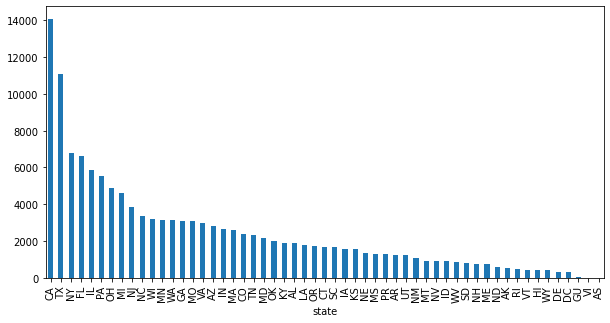

In [32]:
school_cities_state = df[['state','id_school']].groupby('state').count().sort_values('id_school',ascending=False)
school_cities_state.plot(kind='bar',legend=False,figsize=(10,5))
plt.show()

<AxesSubplot:xlabel='state'>

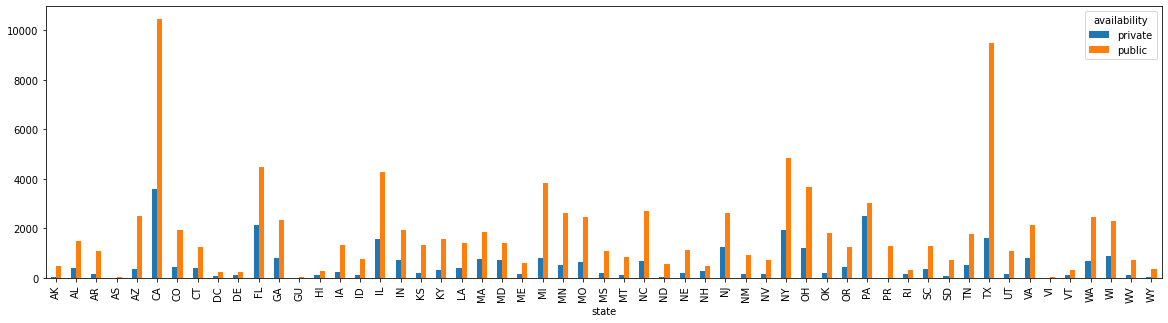

In [33]:
pd.crosstab(df['state'],df['availability']).plot(kind='bar',figsize=(20,5))

We can guess with this bars which state have more population. California and Texas are ranked one and two in the United States population chart.

However, we have some interesting findings in the second chart. For example, Texas has twice as many school schools as New York or Pennsylvania but the mayority of them are public schools. New York and Pennsylvania have more private schools than Texas.

Let's see the distribution of teachers and students across the states.

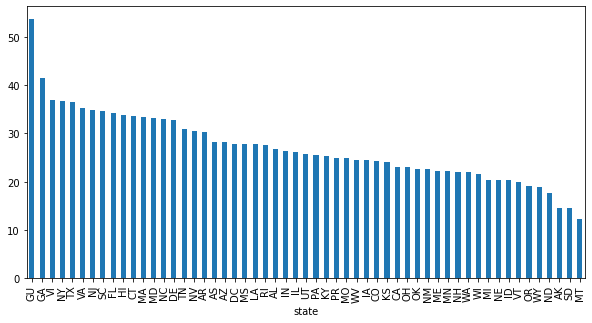

In [34]:
school_cities_state = df[['state','n_teachers']].groupby('state').mean().sort_values('n_teachers',ascending=False)
school_cities_state.plot(kind='bar',legend=False,figsize=(10,5))
plt.show()

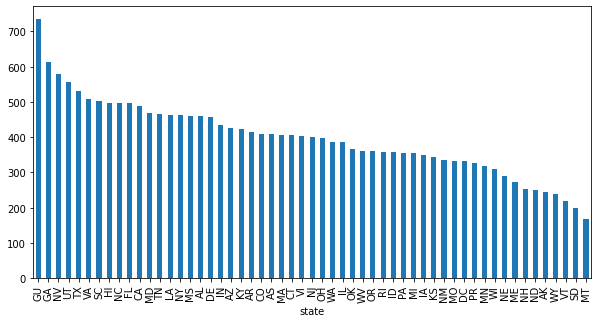

In [35]:
school_cities_state = df[['state','n_students']].groupby('state').mean().sort_values('n_students',ascending=False)
school_cities_state.plot(kind='bar',legend=False,figsize=(10,5))
plt.show()

There isn't a lot of interesting findings here. Guam has a lot of teachers and students in each school whereas Montana has far fewer teachers and students.

Let's check how the difference between teachers and students between private and public schools.

In [36]:
school_cities_state = df[['availability','n_students','n_teachers']].groupby('availability').mean().sort_values('n_students',ascending=False)
school_cities_state['proportion'] = school_cities_state['n_students'] / school_cities_state['n_teachers']
school_cities_state

,n_students,n_teachers,proportion
availability,,,
public,512.601567,32.285266,15.877260
private,142.387909,13.790433,10.325123


There is a big disparity between the number of students each teacher has to teach. In the public system, one professor is assigned to 15.8 students while in the private schools, one professor is assigned to only 10 students.

Adittionaly we have data about universities and colleges. We have to do some minor transform in order to have mnore or less the same data in two dataframes.

In [37]:
df = pd.read_csv(r'D:\Udacity\data\university\Colleges_and_Universities.csv')

In [38]:
df.head()

,index,X,Y,FID,IPEDSID,NAME,ADDRESS,ADDRESS2,CITY,STATE,...,ALIAS,SIZE_SET,INST_SIZE,PT_ENROLL,FT_ENROLL,TOT_ENROLL,HOUSING,DORM_CAP,TOT_EMPLOY,SHELTER_ID
0,0,-92.260490,34.759308,7001,107840,Shorter College,604 Locust St,NOT AVAILABLE,N Little Rock,AR,...,NOT AVAILABLE,-3,1,24,28,52,2,0,18,NOT AVAILABLE
1,1,-121.289431,38.713353,7002,112181,Citrus Heights Beauty College,7518 Baird Way,NOT AVAILABLE,Citris Heights,CA,...,NOT AVAILABLE,-3,1,6,24,30,2,0,9,NOT AVAILABLE
2,2,-118.287070,34.101481,7003,116660,Joe Blasco Makeup Artist Training Center,1670 Hillhurst Avenue,NOT AVAILABLE,Los Angeles,CA,...,NOT AVAILABLE,-3,1,0,24,24,2,0,11,NOT AVAILABLE
3,3,-121.652662,36.700631,7004,125310,Waynes College of Beauty,1271 North Main Street,NOT AVAILABLE,Salinas,CA,...,NOT AVAILABLE,-3,1,18,16,34,2,0,9,NOT AVAILABLE
4,4,-71.070737,42.369930,7005,164368,Hult International Business School,1 Education Street,NOT AVAILABLE,Cambridge,MA,...,NOT AVAILABLE,-3,2,0,2243,2243,2,0,143,NOT AVAILABLE


In [39]:
df.columns

Index(['index', 'X', 'Y', 'FID', 'IPEDSID', 'NAME', 'ADDRESS', 'ADDRESS2',
       'CITY', 'STATE', 'ZIP', 'ZIP4', 'TELEPHONE', 'TYPE', 'STATUS',
       'POPULATION', 'COUNTY', 'COUNTYFIPS', 'COUNTRY', 'LATITUDE',
       'LONGITUDE', 'NAICS_CODE', 'NAICS_DESC', 'SOURCE', 'SOURCE_DAT',
       'VAL_METHOD', 'VAL_DATE', 'WEBSITE', 'STFIPS', 'COFIPS', 'SECTOR',
       'LEVEL_', 'HI_OFFER', 'DEG_GRANT', 'LOCALE', 'CLOSE_DATE', 'MERGE_ID',
       'ALIAS', 'SIZE_SET', 'INST_SIZE', 'PT_ENROLL', 'FT_ENROLL',
       'TOT_ENROLL', 'HOUSING', 'DORM_CAP', 'TOT_EMPLOY', 'SHELTER_ID'],
      dtype='object')

The data from the school and this data have a lot of columns with the same type of data, like the name, city, county. In this case, to match the n_students and n_teachers columns we are going to use the TOT_ENROLL which is the number of students in the university and the TOT_EMPLOY because this level of education needs more people than teachers.

In [40]:
df.drop(['index', 'X', 'Y', 'FID', 'IPEDSID', 'ADDRESS', 'ADDRESS2',
       'ZIP', 'ZIP4', 'TELEPHONE', 'TYPE', 'STATUS',
       'POPULATION', 'COUNTYFIPS', 'LATITUDE',
       'LONGITUDE', 'NAICS_CODE', 'NAICS_DESC', 'SOURCE', 'SOURCE_DAT',
       'VAL_METHOD', 'VAL_DATE', 'WEBSITE', 'STFIPS', 'COFIPS', 'SECTOR',
       'LEVEL_', 'HI_OFFER', 'DEG_GRANT', 'LOCALE', 'CLOSE_DATE', 'MERGE_ID',
       'ALIAS', 'SIZE_SET', 'INST_SIZE', 'PT_ENROLL', 'FT_ENROLL',
       'HOUSING', 'DORM_CAP', 'SHELTER_ID'],inplace=True, axis=1)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7735 entries, 0 to 7734
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   NAME        7735 non-null   object
 1   CITY        7735 non-null   object
 2   STATE       7735 non-null   object
 3   COUNTY      7735 non-null   object
 4   COUNTRY     7735 non-null   object
 5   TOT_ENROLL  7735 non-null   int64 
 6   TOT_EMPLOY  7735 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 423.1+ KB


In [42]:
df.describe()

,TOT_ENROLL,TOT_EMPLOY
count,7735.000000,7735.000000
mean,2759.578151,474.268649
std,6695.364257,1488.795583
min,0.000000,0.000000
25%,114.000000,20.000000
50%,434.000000,74.000000
75%,2232.500000,383.000000
max,204920.000000,28018.000000


In [43]:
df.reset_index(inplace=True)

In [44]:
df['availability'] = 'No data'

In [45]:
new_columns = ['id_college','name','city','state','county','country','n_students','n_employees','availability']
df.columns = new_columns

In [46]:
df.head()

,id_college,name,city,state,county,country,n_students,n_employees,availability
0,0,Shorter College,N Little Rock,AR,Pulaski,US,52,18,No data
1,1,Citrus Heights Beauty College,Citris Heights,CA,Sacramento,US,30,9,No data
2,2,Joe Blasco Makeup Artist Training Center,Los Angeles,CA,Los Angeles,US,24,11,No data
3,3,Waynes College of Beauty,Salinas,CA,Monterey,US,34,9,No data
4,4,Hult International Business School,Cambridge,MA,Middlesex,US,2243,143,No data


Finally, we have the schools dataset and the college dataset unified in the same format. In order to create our model in the database, we have to explore the others dataset in order to know which columns are needed.